In [83]:
pip install tensorflow

In [84]:
import pandas as pd
import tensorflow as tf


In [86]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

In [87]:
df=pd.read_csv("/content/forestfires (1).csv")

In [88]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# **EDA**

In [89]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [91]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [92]:
df=df.drop(columns=['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct', 'monthsep',])

In [93]:

month_data={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df.replace(month_data,inplace=True)

day_data={'day':{'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':'7'}}
df.replace(day_data,inplace=True)

df.size_category.replace(('small','large'),(1,0),inplace=True)

In [94]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [95]:
df['size_category'].unique()

array([1, 0])

In [96]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df[['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area']]=sc.fit_transform(df[['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area']])

In [97]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1
1,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,1
2,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,1
3,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1
4,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,1


# **Building Neural Networks**

In [98]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1
1,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,1
2,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,1
3,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1
4,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,1


In [99]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
y


0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [100]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

In [101]:
xtrain.shape

(413, 11)

In [102]:
len(df)

517

In [116]:
model=Sequential()
model.add(Dense(20,input_dim=11,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [117]:
#compile Model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [118]:
#fit the model

h=model.fit(xtrain, ytrain, validation_split=0.2, epochs=70, batch_size=32)

Epoch 1/70
11/11 [==============================] - 1s 25ms/step - loss: 0.6718 - accuracy: 0.6576 - val_loss: 0.6351 - val_accuracy: 0.6988
Epoch 2/70
11/11 [==============================] - 0s 7ms/step - loss: 0.6561 - accuracy: 0.6848 - val_loss: 0.6203 - val_accuracy: 0.7470
Epoch 3/70
11/11 [==============================] - 0s 5ms/step - loss: 0.6434 - accuracy: 0.7242 - val_loss: 0.6093 - val_accuracy: 0.7952
Epoch 4/70
11/11 [==============================] - 0s 7ms/step - loss: 0.6326 - accuracy: 0.7242 - val_loss: 0.5992 - val_accuracy: 0.7952
Epoch 5/70
11/11 [==============================] - 0s 5ms/step - loss: 0.6221 - accuracy: 0.7273 - val_loss: 0.5916 - val_accuracy: 0.7952
Epoch 6/70
11/11 [==============================] - 0s 7ms/step - loss: 0.6132 - accuracy: 0.7182 - val_loss: 0.5844 - val_accuracy: 0.7952
Epoch 7/70
11/11 [==============================] - 0s 7ms/step - loss: 0.6048 - accuracy: 0.7182 - val_loss: 0.5775 - val_accuracy: 0.7952
Epoch 8/70
11/11 [=

In [120]:
#evaluate model on train data

scores=model.evaluate(xtrain,ytrain)
print(model.metrics_names[1],scores[1]*100)

13/13 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.9128
accuracy 91.28329157829285


# **Visualizing Accuracy and Loss of Training Data and Validation Data**

In [121]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

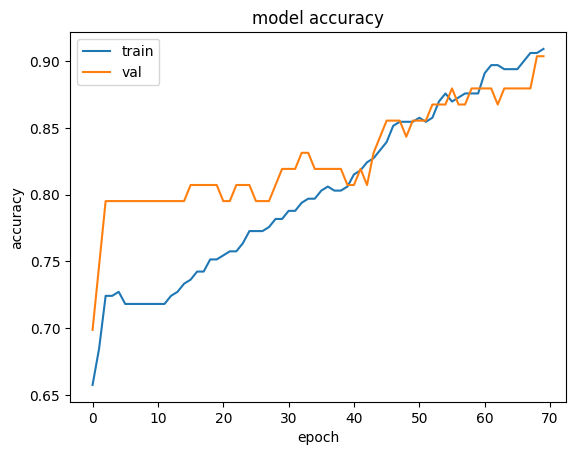

In [124]:
import matplotlib.pyplot as plt
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

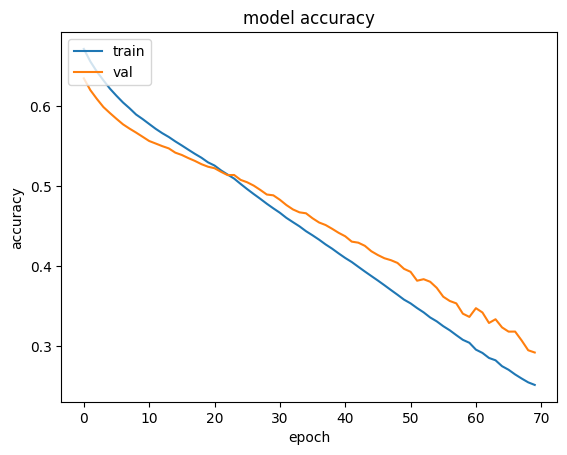

In [125]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [142]:
scores=model.evaluate(xtest,ytest)
print(model.metrics_names[1] +" is")
print(scores[1]*100)

4/4 [==============================] - 0s 4ms/step - loss: 0.4903 - accuracy: 0.8942
accuracy is
89.42307829856873


# **Tuning Of HyperParameters :- Batch size Epochs**

In [143]:
pip install scikeras

In [144]:
from sklearn.model_selection import GridSearchCV,KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam


In [145]:
# create model

def create_model():
  model=Sequential()
  model.add(Dense(12,input_dim=11,kernel_initializer='uniform',activation='relu'))#1st layer
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))#2nd layer
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))#output layer

  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model


In [148]:
model=KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[13,27,38]
epochs=[16,45,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=12)
grid_results=grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=13, epochs=16....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 1/9] END .....batch_size=13, epochs=16;, score=0.711 total time=   2.5s
[CV 2/5; 1/9] START batch_size=13, epochs=16....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 1/9] END .....batch_size=13, epochs=16;, score=0.687 total time=   2.3s
[CV 3/5; 1/9] START batch_size=13, epochs=16....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 1/9] END .....batch_size=13, epochs=16;, score=0.747 total time=   1.7s
[CV 4/5; 1/9] START batch_size=13, epochs=16....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 1/9] END .....batch_size=13, epochs=16;, score=0.866 total time=   2.3s
[CV 5/5; 1/9] START batch_size=13, epochs=16....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 1/9] END .....batch_size=13, epochs=16;, score=0.793 total time=   1.9s
[CV 1/5; 2/9] START batch_size=13, epochs=45....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 2/9] END .....batch_size=13, epochs=45;, score=0.867 total time=   3.3s
[CV 2/5; 2/9] START batch_size=13, epochs=45....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 2/9] END .....batch_size=13, epochs=45;, score=0.928 total time=   3.6s
[CV 3/5; 2/9] START batch_size=13, epochs=45....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 2/9] END .....batch_size=13, epochs=45;, score=0.952 total time=   3.6s
[CV 4/5; 2/9] START batch_size=13, epochs=45....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 2/9] END .....batch_size=13, epochs=45;, score=0.951 total time=   4.3s
[CV 5/5; 2/9] START batch_size=13, epochs=45....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 2/9] END .....batch_size=13, epochs=45;, score=0.951 total time=   2.8s
[CV 1/5; 3/9] START batch_size=13, epochs=200...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 3/9] END ....batch_size=13, epochs=200;, score=0.964 total time=  21.8s
[CV 2/5; 3/9] START batch_size=13, epochs=200...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 3/9] END ....batch_size=13, epochs=200;, score=0.964 total time=  10.0s
[CV 3/5; 3/9] START batch_size=13, epochs=200...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 3/9] END ....batch_size=13, epochs=200;, score=0.988 total time=   9.9s
[CV 4/5; 3/9] START batch_size=13, epochs=200...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 3/9] END ....batch_size=13, epochs=200;, score=0.976 total time=  11.4s
[CV 5/5; 3/9] START batch_size=13, epochs=200...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 3/9] END ....batch_size=13, epochs=200;, score=0.963 total time=   9.9s
[CV 1/5; 4/9] START batch_size=27, epochs=16....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 4/9] END .....batch_size=27, epochs=16;, score=0.711 total time=   2.1s
[CV 2/5; 4/9] START batch_size=27, epochs=16....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 4/9] END .....batch_size=27, epochs=16;, score=0.687 total time=   1.4s
[CV 3/5; 4/9] START batch_size=27, epochs=16....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 4/9] END .....batch_size=27, epochs=16;, score=0.747 total time=   1.6s
[CV 4/5; 4/9] START batch_size=27, epochs=16....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 4/9] END .....batch_size=27, epochs=16;, score=0.732 total time=   1.6s
[CV 5/5; 4/9] START batch_size=27, epochs=16....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 4/9] END .....batch_size=27, epochs=16;, score=0.817 total time=   1.6s
[CV 1/5; 5/9] START batch_size=27, epochs=45....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 5/9] END .....batch_size=27, epochs=45;, score=0.759 total time=   3.0s
[CV 2/5; 5/9] START batch_size=27, epochs=45....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 5/9] END .....batch_size=27, epochs=45;, score=0.843 total time=   3.6s
[CV 3/5; 5/9] START batch_size=27, epochs=45....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 5/9] END .....batch_size=27, epochs=45;, score=0.855 total time=   2.0s
[CV 4/5; 5/9] START batch_size=27, epochs=45....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 5/9] END .....batch_size=27, epochs=45;, score=0.878 total time=   2.7s
[CV 5/5; 5/9] START batch_size=27, epochs=45....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 5/9] END .....batch_size=27, epochs=45;, score=0.902 total time=   2.3s
[CV 1/5; 6/9] START batch_size=27, epochs=200...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 6/9] END ....batch_size=27, epochs=200;, score=0.964 total time=  11.3s
[CV 2/5; 6/9] START batch_size=27, epochs=200...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 6/9] END ....batch_size=27, epochs=200;, score=0.964 total time=  11.2s
[CV 3/5; 6/9] START batch_size=27, epochs=200...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 6/9] END ....batch_size=27, epochs=200;, score=0.976 total time=   6.0s
[CV 4/5; 6/9] START batch_size=27, epochs=200...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 6/9] END ....batch_size=27, epochs=200;, score=0.976 total time=   7.2s
[CV 5/5; 6/9] START batch_size=27, epochs=200...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 6/9] END ....batch_size=27, epochs=200;, score=0.963 total time=  11.2s
[CV 1/5; 7/9] START batch_size=38, epochs=16....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 7/9] END .....batch_size=38, epochs=16;, score=0.711 total time=   1.3s
[CV 2/5; 7/9] START batch_size=38, epochs=16....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 7/9] END .....batch_size=38, epochs=16;, score=0.687 total time=   1.3s
[CV 3/5; 7/9] START batch_size=38, epochs=16....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 7/9] END .....batch_size=38, epochs=16;, score=0.747 total time=   1.3s
[CV 4/5; 7/9] START batch_size=38, epochs=16....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 7/9] END .....batch_size=38, epochs=16;, score=0.732 total time=   2.0s
[CV 5/5; 7/9] START batch_size=38, epochs=16....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 7/9] END .....batch_size=38, epochs=16;, score=0.793 total time=   1.4s
[CV 1/5; 8/9] START batch_size=38, epochs=45....................................
[CV 1/5; 8/9] END .....batch_size=38, epochs=45;, score=0.711 total time=   2.3s
[CV 2/5; 8/9] START batch_size=38, epochs=45....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 8/9] END .....batch_size=38, epochs=45;, score=0.711 total time=   2.3s
[CV 3/5; 8/9] START batch_size=38, epochs=45....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 8/9] END .....batch_size=38, epochs=45;, score=0.807 total time=   1.8s
[CV 4/5; 8/9] START batch_size=38, epochs=45....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 8/9] END .....batch_size=38, epochs=45;, score=0.866 total time=   2.3s
[CV 5/5; 8/9] START batch_size=38, epochs=45....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 8/9] END .....batch_size=38, epochs=45;, score=0.878 total time=   2.6s
[CV 1/5; 9/9] START batch_size=38, epochs=200...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 9/9] END ....batch_size=38, epochs=200;, score=0.964 total time=   4.2s
[CV 2/5; 9/9] START batch_size=38, epochs=200...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 9/9] END ....batch_size=38, epochs=200;, score=0.964 total time=   4.3s
[CV 3/5; 9/9] START batch_size=38, epochs=200...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 9/9] END ....batch_size=38, epochs=200;, score=0.976 total time=   6.9s
[CV 4/5; 9/9] START batch_size=38, epochs=200...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 9/9] END ....batch_size=38, epochs=200;, score=0.988 total time=   6.2s
[CV 5/5; 9/9] START batch_size=38, epochs=200...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 9/9] END ....batch_size=38, epochs=200;, score=0.951 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [149]:
grid_results.best_score_
grid_results.best_params_

{'batch_size': 13, 'epochs': 200}